In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create a time range at 15 minute intervals for one day
time_range = pd.date_range(start='2023-01-19 00:00:00', end='2023-02-18 23:45:00', freq='15min')

# Create a dictionary to store the columns
columns = {'time': time_range}

# Create 98 additional columns with random integer values between 1 and 100
for i in range(0, 30):
    column_name = 'MCS' + str(i)
    values = np.random.choice([0, np.random.randint(1, 10000)], size=len(time_range), p=[0.98, 0.02])
    columns[column_name] = values

# Create a DataFrame with the time series column and the additional value columns
df = pd.DataFrame(columns)
df.head(1)

,time,MCS0,MCS1,MCS2,MCS3,MCS4,MCS5,MCS6,MCS7,MCS8,...,MCS20,MCS21,MCS22,MCS23,MCS24,MCS25,MCS26,MCS27,MCS28,MCS29
0,2023-01-19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3574


In [2]:
df.insert(1, 'Date', df['time'].dt.strftime('%Y-%m-%d'))

In [3]:
df.head(1)

,time,Date,MCS0,MCS1,MCS2,MCS3,MCS4,MCS5,MCS6,MCS7,...,MCS20,MCS21,MCS22,MCS23,MCS24,MCS25,MCS26,MCS27,MCS28,MCS29
0,2023-01-19,2023-01-19,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3574


In [4]:
df[['time', 'Date']].head(3)

,time,Date
0,2023-01-19 00:00:00,2023-01-19
1,2023-01-19 00:15:00,2023-01-19
2,2023-01-19 00:30:00,2023-01-19


In [5]:
df_melted = pd.melt(df, id_vars=['Date'], value_vars=df.columns[2:], var_name='MCS', value_name='Value')
df_melted.head(3)

,Date,MCS,Value
0,2023-01-19,MCS0,0
1,2023-01-19,MCS0,0
2,2023-01-19,MCS0,0


In [6]:
df_melted['MCS'].unique()

array(['MCS0', 'MCS1', 'MCS2', 'MCS3', 'MCS4', 'MCS5', 'MCS6', 'MCS7',
       'MCS8', 'MCS9', 'MCS10', 'MCS11', 'MCS12', 'MCS13', 'MCS14',
       'MCS15', 'MCS16', 'MCS17', 'MCS18', 'MCS19', 'MCS20', 'MCS21',
       'MCS22', 'MCS23', 'MCS24', 'MCS25', 'MCS26', 'MCS27', 'MCS28',
       'MCS29'], dtype=object)

In [7]:
df_pivot = df_melted.pivot_table(index='Date', columns='MCS', values='Value', aggfunc=np.sum)
df_pivot.head(1)

MCS,MCS0,MCS1,MCS10,MCS11,MCS12,MCS13,MCS14,MCS15,MCS16,MCS17,...,MCS27,MCS28,MCS29,MCS3,MCS4,MCS5,MCS6,MCS7,MCS8,MCS9
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-19,22044,2967,13210,9714,7734,14180,11248,26424,7376,26280,...,0,205,10722,2085,6764,6017,5111,2662,0,7754


In [8]:
df_pivot.columns = df_pivot.columns.str.extract('(\d+)', expand=False).astype(int)
df_pivot.head(1)

MCS,0,1,10,11,12,13,14,15,16,17,...,27,28,29,3,4,5,6,7,8,9
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-19,22044,2967,13210,9714,7734,14180,11248,26424,7376,26280,...,0,205,10722,2085,6764,6017,5111,2662,0,7754


In [9]:
df_pivot = df_pivot.reindex(sorted(df_pivot.columns), axis=1)
df_pivot.head(1)

MCS,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-19,22044,2967,3900,2085,6764,6017,5111,2662,0,7754,...,13764,6286,5687,42995,4893,11580,2390,0,205,10722


In [10]:
df_pivot.columns = 'MCS' + df_pivot.columns.astype(str)
df_pivot.head(1)

MCS,MCS0,MCS1,MCS2,MCS3,MCS4,MCS5,MCS6,MCS7,MCS8,MCS9,...,MCS20,MCS21,MCS22,MCS23,MCS24,MCS25,MCS26,MCS27,MCS28,MCS29
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-19,22044,2967,3900,2085,6764,6017,5111,2662,0,7754,...,13764,6286,5687,42995,4893,11580,2390,0,205,10722


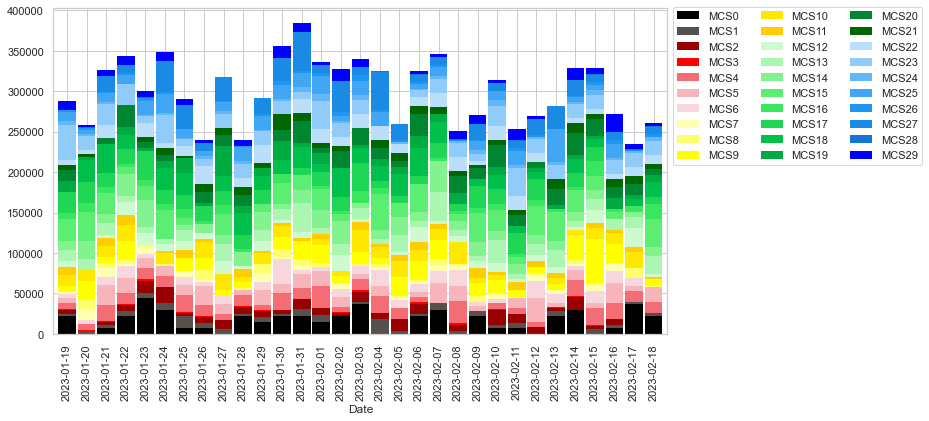

In [11]:
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(11, 6))

colors = {'MCS0':'black', 'MCS1':'#57504d', 'MCS2':'#990000', 'MCS3':'red', 'MCS4':'#f46d75', 
          'MCS5':'#f7b4bb', 'MCS6':'#f7d7dc', 'MCS7':'#feffb1', 'MCS8':'#feff6e', 'MCS9':'yellow', 
          'MCS10':'#ffe800', 'MCS11':'#ffcd01', 'MCS12':'#cefad0', 'MCS13':'#abf7b1', 'MCS14':'#83f28f', 
          'MCS15':'#5ced73', 'MCS16':'#39e75f', 'MCS17':'#1fd655', 'MCS18':'#00c04b', 'MCS19':'#00ab41',
          'MCS20':'#008631', 'MCS21':'#006600', 'MCS22':'#bbdffb', 'MCS23':'#90cbf9', 'MCS24':'#64b7f6', 
          'MCS25':'#41a7f5', 'MCS26':'#1e97f3', 'MCS27':'#1a8ae5', 'MCS28':'#1477d2', 'MCS29':'blue'}

ax = df_pivot.plot(ax=ax, kind='bar', stacked=True, color=colors.values(), edgecolor='none', width=0.9)

ax.legend(bbox_to_anchor=(1, 1.02), ncol=3, loc=2)
plt.show()

# Normalized ver.

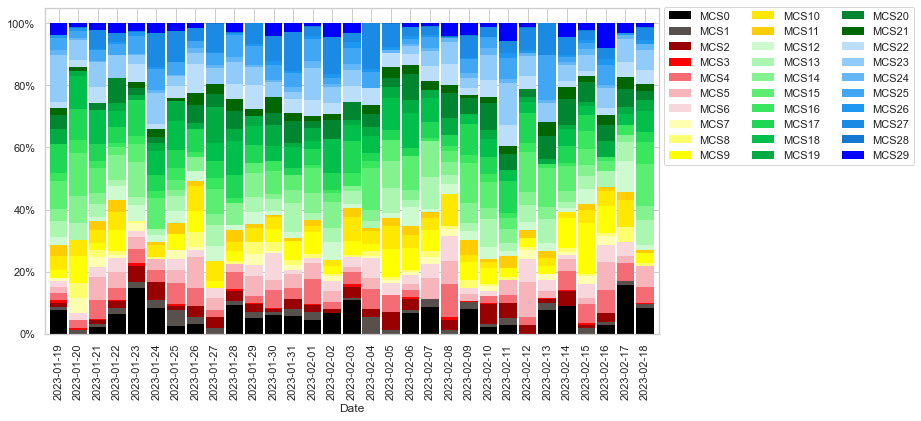

In [12]:
df_norm = df_pivot.div(df_pivot.sum(axis=1), axis=0)

from matplotlib.ticker import PercentFormatter
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(11, 6))

colors = {'MCS0':'black', 'MCS1':'#57504d', 'MCS2':'#990000', 'MCS3':'red', 'MCS4':'#f46d75', 
          'MCS5':'#f7b4bb', 'MCS6':'#f7d7dc', 'MCS7':'#feffb1', 'MCS8':'#feff6e', 'MCS9':'yellow', 
          'MCS10':'#ffe800', 'MCS11':'#ffcd01', 'MCS12':'#cefad0', 'MCS13':'#abf7b1', 'MCS14':'#83f28f', 
          'MCS15':'#5ced73', 'MCS16':'#39e75f', 'MCS17':'#1fd655', 'MCS18':'#00c04b', 'MCS19':'#00ab41',
          'MCS20':'#008631', 'MCS21':'#006600', 'MCS22':'#bbdffb', 'MCS23':'#90cbf9', 'MCS24':'#64b7f6', 
          'MCS25':'#41a7f5', 'MCS26':'#1e97f3', 'MCS27':'#1a8ae5', 'MCS28':'#1477d2', 'MCS29':'blue'}

ax = df_norm.plot(ax=ax, kind='bar', stacked=True, color=colors.values(), edgecolor='none', width=0.9)

ax.yaxis.set_major_formatter(PercentFormatter(xmax=1, decimals=0))
ax.legend(bbox_to_anchor=(1, 1.02), ncol=3, loc=2)
plt.show()

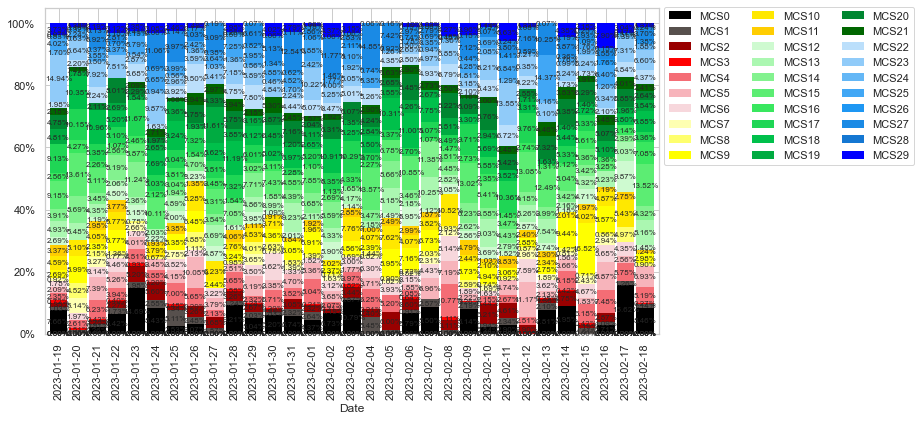

In [13]:
from matplotlib.ticker import PercentFormatter
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(11, 6))

colors = {'MCS0':'black', 'MCS1':'#57504d', 'MCS2':'#990000', 'MCS3':'red', 'MCS4':'#f46d75', 
          'MCS5':'#f7b4bb', 'MCS6':'#f7d7dc', 'MCS7':'#feffb1', 'MCS8':'#feff6e', 'MCS9':'yellow', 
          'MCS10':'#ffe800', 'MCS11':'#ffcd01', 'MCS12':'#cefad0', 'MCS13':'#abf7b1', 'MCS14':'#83f28f', 
          'MCS15':'#5ced73', 'MCS16':'#39e75f', 'MCS17':'#1fd655', 'MCS18':'#00c04b', 'MCS19':'#00ab41',
          'MCS20':'#008631', 'MCS21':'#006600', 'MCS22':'#bbdffb', 'MCS23':'#90cbf9', 'MCS24':'#64b7f6', 
          'MCS25':'#41a7f5', 'MCS26':'#1e97f3', 'MCS27':'#1a8ae5', 'MCS28':'#1477d2', 'MCS29':'blue'}

ax = df_norm.plot(ax=ax, kind='bar', stacked=True, color=colors.values(), edgecolor='none', width=0.9)
for i, patch in enumerate(ax.patches):
    x = patch.get_x() + patch.get_width() / 2
    y = patch.get_y() + patch.get_height() / 2
    value = f'{patch.get_height()*100:.2f}%'
    ax.annotate(value, (x, y), ha='center', va='center', fontsize=8)
    
ax.yaxis.set_major_formatter(PercentFormatter(xmax=1, decimals=0))
ax.legend(bbox_to_anchor=(1, 1.02), ncol=3, loc=2)
plt.show()

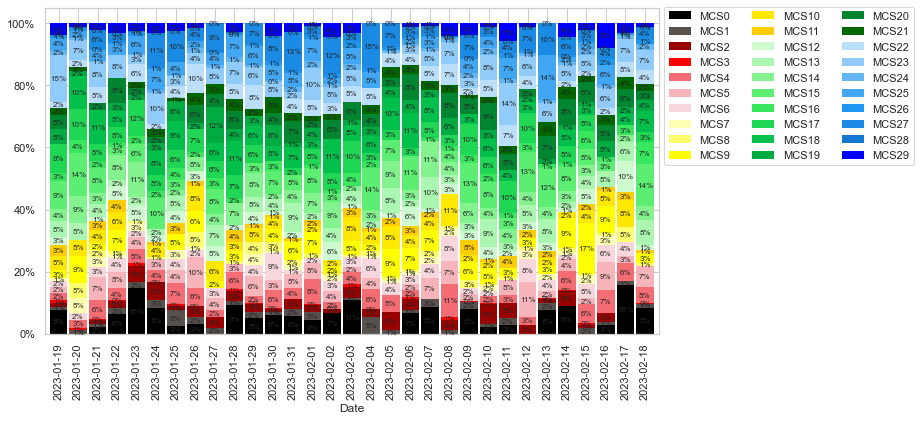

In [14]:
from matplotlib.ticker import PercentFormatter
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(11, 6))

colors = {'MCS0':'black', 'MCS1':'#57504d', 'MCS2':'#990000', 'MCS3':'red', 'MCS4':'#f46d75', 
          'MCS5':'#f7b4bb', 'MCS6':'#f7d7dc', 'MCS7':'#feffb1', 'MCS8':'#feff6e', 'MCS9':'yellow', 
          'MCS10':'#ffe800', 'MCS11':'#ffcd01', 'MCS12':'#cefad0', 'MCS13':'#abf7b1', 'MCS14':'#83f28f', 
          'MCS15':'#5ced73', 'MCS16':'#39e75f', 'MCS17':'#1fd655', 'MCS18':'#00c04b', 'MCS19':'#00ab41',
          'MCS20':'#008631', 'MCS21':'#006600', 'MCS22':'#bbdffb', 'MCS23':'#90cbf9', 'MCS24':'#64b7f6', 
          'MCS25':'#41a7f5', 'MCS26':'#1e97f3', 'MCS27':'#1a8ae5', 'MCS28':'#1477d2', 'MCS29':'blue'}

ax = df_norm.plot(ax=ax, kind='bar', stacked=True, color=colors.values(), edgecolor='none', width=0.9)

for container in ax.containers:
    ax.bar_label(container, labels=[f'{x:.0%}' if x != 0 else '' for x in container.datavalues], label_type='center', fontsize=8)
    
ax.yaxis.set_major_formatter(PercentFormatter(xmax=1, decimals=0))
ax.legend(bbox_to_anchor=(1, 1.02), ncol=3, loc=2)
plt.show()

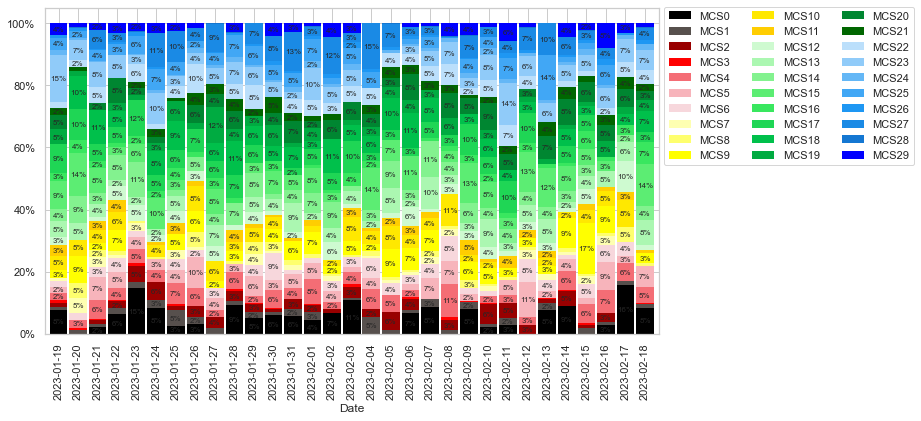

In [15]:
from matplotlib.ticker import PercentFormatter
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(11, 6))

colors = {'MCS0':'black', 'MCS1':'#57504d', 'MCS2':'#990000', 'MCS3':'red', 'MCS4':'#f46d75', 
          'MCS5':'#f7b4bb', 'MCS6':'#f7d7dc', 'MCS7':'#feffb1', 'MCS8':'#feff6e', 'MCS9':'yellow', 
          'MCS10':'#ffe800', 'MCS11':'#ffcd01', 'MCS12':'#cefad0', 'MCS13':'#abf7b1', 'MCS14':'#83f28f', 
          'MCS15':'#5ced73', 'MCS16':'#39e75f', 'MCS17':'#1fd655', 'MCS18':'#00c04b', 'MCS19':'#00ab41',
          'MCS20':'#008631', 'MCS21':'#006600', 'MCS22':'#bbdffb', 'MCS23':'#90cbf9', 'MCS24':'#64b7f6', 
          'MCS25':'#41a7f5', 'MCS26':'#1e97f3', 'MCS27':'#1a8ae5', 'MCS28':'#1477d2', 'MCS29':'blue'}

ax = df_norm.plot(ax=ax, kind='bar', stacked=True, color=colors.values(), edgecolor='none', width=0.9)

# no display the label if the value is lower than 0.02
for container in ax.containers:
    labels = [f'{x:.0%}' if x >= 0.02 else '' for x in container.datavalues]
    ax.bar_label(container, labels=labels, label_type='center', fontsize=8)
    
ax.yaxis.set_major_formatter(PercentFormatter(xmax=1, decimals=0))
ax.legend(bbox_to_anchor=(1, 1.02), ncol=3, loc=2)
plt.show()

# Display different label color if the bar color is dark

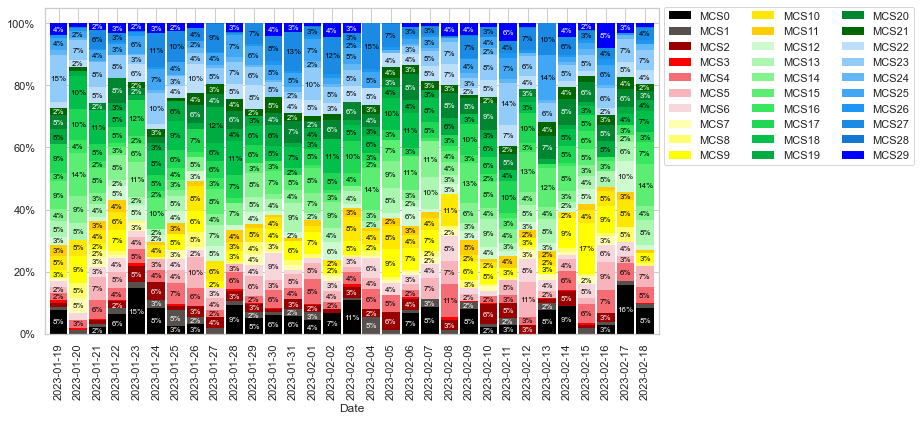

In [16]:
from matplotlib.ticker import PercentFormatter
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(11, 6))

colors = {'MCS0':'black', 'MCS1':'#57504d', 'MCS2':'#990000', 'MCS3':'red', 'MCS4':'#f46d75', 
          'MCS5':'#f7b4bb', 'MCS6':'#f7d7dc', 'MCS7':'#feffb1', 'MCS8':'#feff6e', 'MCS9':'yellow', 
          'MCS10':'#ffe800', 'MCS11':'#ffcd01', 'MCS12':'#cefad0', 'MCS13':'#abf7b1', 'MCS14':'#83f28f', 
          'MCS15':'#5ced73', 'MCS16':'#39e75f', 'MCS17':'#1fd655', 'MCS18':'#00c04b', 'MCS19':'#00ab41',
          'MCS20':'#008631', 'MCS21':'#006600', 'MCS22':'#bbdffb', 'MCS23':'#90cbf9', 'MCS24':'#64b7f6', 
          'MCS25':'#41a7f5', 'MCS26':'#1e97f3', 'MCS27':'#1a8ae5', 'MCS28':'#1477d2', 'MCS29':'blue'}

ax = df_norm.plot(ax=ax, kind='bar', stacked=True, color=colors.values(), edgecolor='none', width=0.9)

# no display the label if the value is lower than 0.02 and the text color is 'white' if the condition is true
for container in ax.containers:
    labels = [f'{x:.0%}' if x >= 0.02 else '' for x in container.datavalues]
    if (container.get_label() == 'MCS0') | (container.get_label() == 'MCS1') | \
    (container.get_label() == 'MCS2') | (container.get_label() == 'MCS20') | \
    (container.get_label() == 'MCS21') | (container.get_label() == 'MCS28') | \
    (container.get_label() == 'MCS29'):
        ax.bar_label(container, labels=labels, label_type='center', fontsize=8, color='white')
    else:
        ax.bar_label(container, labels=labels, label_type='center', fontsize=8, color='black')

ax.yaxis.set_major_formatter(PercentFormatter(xmax=1, decimals=0))
ax.legend(bbox_to_anchor=(1, 1.02), ncol=3, loc=2)
plt.show()

# Final ver.

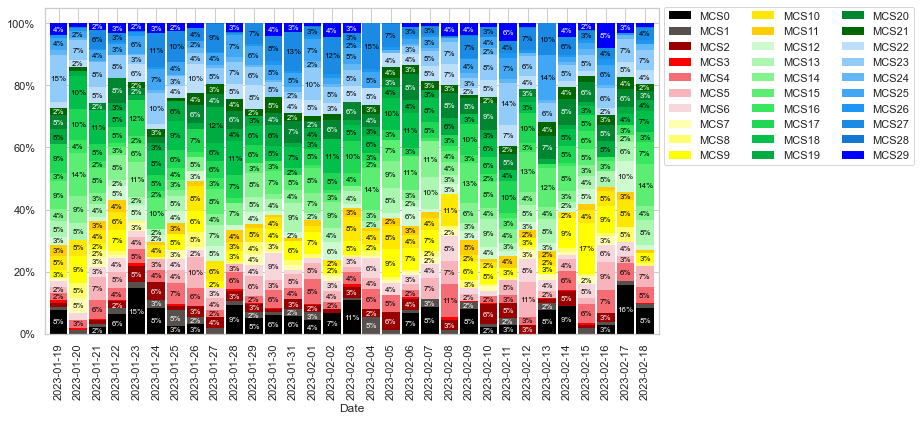

In [17]:
from matplotlib.ticker import PercentFormatter
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(11, 6))

colors = {'MCS0':'black', 'MCS1':'#57504d', 'MCS2':'#990000', 'MCS3':'red', 'MCS4':'#f46d75', 
          'MCS5':'#f7b4bb', 'MCS6':'#f7d7dc', 'MCS7':'#feffb1', 'MCS8':'#feff6e', 'MCS9':'yellow', 
          'MCS10':'#ffe800', 'MCS11':'#ffcd01', 'MCS12':'#cefad0', 'MCS13':'#abf7b1', 'MCS14':'#83f28f', 
          'MCS15':'#5ced73', 'MCS16':'#39e75f', 'MCS17':'#1fd655', 'MCS18':'#00c04b', 'MCS19':'#00ab41',
          'MCS20':'#008631', 'MCS21':'#006600', 'MCS22':'#bbdffb', 'MCS23':'#90cbf9', 'MCS24':'#64b7f6', 
          'MCS25':'#41a7f5', 'MCS26':'#1e97f3', 'MCS27':'#1a8ae5', 'MCS28':'#1477d2', 'MCS29':'blue'}

ax = df_norm.plot(ax=ax, kind='bar', stacked=True, color=colors.values(), edgecolor='none', width=0.9)

# no display the label if the value is lower than 0.02 and the text color is 'white' if the condition is true
for container in ax.containers:
    labels = [f'{x:.0%}' if x >= 0.02 else '' for x in container.datavalues]
    if container.get_label() in ['MCS0', 'MCS1', 'MCS2', 'MCS20', 'MCS21', 'MCS28', 'MCS29']:
        ax.bar_label(container, labels=labels, label_type='center', fontsize=8, color='white')
    else:
        ax.bar_label(container, labels=labels, label_type='center', fontsize=8, color='black')

ax.yaxis.set_major_formatter(PercentFormatter(xmax=1, decimals=0))
ax.legend(bbox_to_anchor=(1, 1.02), ncol=3, loc=2)
plt.show()